Universidad Galileo  
PAPD  
Ciencia de Datos en Python  
Ramiro Wong Martínez  
Carné 23000952

# Laboratorio #3

### Parte 1

1) ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [76]:
import numpy as np

#generando array de 1000 booleanos
array_booleanos = np.random.choice([True, False], size=1000) 

#obteniendo tamaño del array
tamanio_bytes = array_booleanos.nbytes

print("El tamaño en bytes de un array de 1000 booleanos es: ", tamanio_bytes)

El tamaño en bytes de un array de 1000 booleanos es:  1000


2) Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente.  
Muestre los 10 últimos por pantalla.

In [27]:
array_pares = []

for i in range (100, 0, -1):
    if (i%2 == 0):
        array_pares.append(i)

print(array_pares[-10:])

[20, 18, 16, 14, 12, 10, 8, 6, 4, 2]


3) Dado el array  
    2 4 5 6  
    0 3 7 4  
    8 8 5 2  
    1 5 6 1  
Seleccione con una instrucción el subarray de elementos  
    0 3 7 4  
Después, seleccione el subarray de elementos  
    2 5  
    8 5  

In [16]:
array_1 = [[2, 4, 5, 6], [0, 3, 7, 4], [8, 8, 5, 2], [1, 5, 6, 1]]

subarray_1 = array_1[1]
print(subarray_1)

subarray_2 = [[array_1[0][0], array_1[0][2]], [array_1[2][1], array_1[2][2]]]
print(subarray_2)

[0, 3, 7, 4]
[[2, 5], [8, 5]]


4) Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],  
obtenga la media aritmética de la diferencia (a-b).

In [25]:
a = [1, 4, 2, 7]
b = [1, 3, 2, 9]
c = []

#restando ambos arrays y almacenando resultado en array "c"
for i in range(len(a)):
    diferencia = a[i] - b[i]
    c.append(diferencia)

#obteniendo medio aritmética de "c"
valor_acumulado = 0
for valor in c:
    valor_acumulado = valor_acumulado + valor

lista_promedio = valor_acumulado/len(c)
print("La media aritmética de la diferencia entre a y b es: ", lista_promedio)
    

La media aritmética de la diferencia entre a y b es:  -0.25


5) Tengo valores de cordenadas (x, y) en las columnas del array  
1.33 4.5  
30.0 10.7  
70.2 0.5  
Agregue a este array las coordenadas (37.1, -3.6).  
Muestre en pantalla las dimensiones del nuevo array.

In [30]:
maestro_coordenadas = [[1.33, 4.5], [30.0, 10.7], [70.2, 0.5]]

maestro_coordenadas.append([37.1, -3.6])

print("Dimensiones: ", len(maestro_coordenadas), "x", len(maestro_coordenadas[0]))

Dimensiones:  4 x 2


6) Copie el array del ejercicio anterior. Traspóngalo.  
Agregue ahora dos nuevos pares de coordenadas: (10.8, 3.0) y (35.8, 12.0).

In [36]:
array_transpuesto = [list(row) for row in zip(*maestro_coordenadas)]

array_transpuesto[0].append(10.8)
array_transpuesto[0].append(35.8)
array_transpuesto[1].append(3.0)
array_transpuesto[1].append(12.0)

print(array_transpuesto)

[[1.33, 30.0, 70.2, 37.1, 10.8, 35.8], [4.5, 10.7, 0.5, -3.6, 3.0, 12.0]]


### Parte 2: Exploración y Minería de Datos

Con el dataset nucleospoblacion.csv adjunto al laboratorio,
luego responda las siguientes preguntas usando pandas y
matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv("NucleosPoblacion.csv")
dataset.head()

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873


1) ¿Cuántos Municipios tienen más de 100000 habitantes?

In [32]:
#obtenemos todos lo municipios con más de 100,000 hab
municipios_100000 = dataset[dataset["Poblacion"]>100000]

#obtenemos la cantidad de registros en ese dataset
a = len(municipios_100000["Municipio"].unique())

print(f"Hay {a} municipios con más de 100,000 habitantes.")

Hay 62 municipios con más de 100,000 habitantes.


2) Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:  
a. ¿Cuál es la segunda ciudad más poblada?  
b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

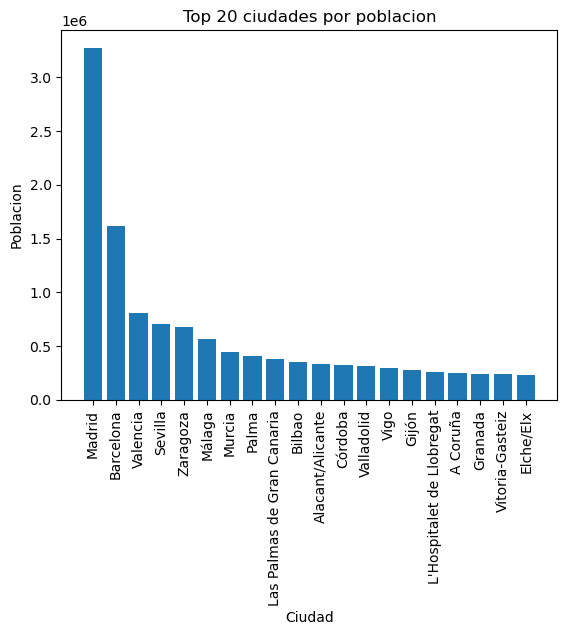

a) La segunda ciudad más importante por población es Barcelona
b) Granada es la ciudad #18 por población


In [16]:
#primero ordenamos el dataset por poblacion
dataset_ordenado = dataset.sort_values(by="Poblacion", ascending=False)

#graficamos sólo las primeras 20 ciudades para visualizar de forma correcta
top_20_ciudades = dataset_ordenado.head(20)

plt.bar(top_20_ciudades["Municipio"], top_20_ciudades["Poblacion"])
plt.xlabel('Ciudad')
plt.ylabel('Poblacion')
plt.title('Top 20 ciudades por poblacion')
plt.xticks(rotation=90)
plt.show()

print("a) La segunda ciudad más importante por población es Barcelona")
print("b) Granada es la ciudad #18 por población")

3) ¿Cuántos municipios de Navarra tienen más de 5000 habitantes?.  

In [31]:
#obtenemos los municipios de Navarra con más de 5000 hab. en un nuevo dataset
ciudades_navarra = dataset[(dataset["Provincia"] == "Navarra") & (dataset["Poblacion"] > 5000)]

#obtenemos la cantidad de registros del nuevo dataset
d = len(ciudades_navarra["Municipio"].unique())

print(f"Hay {d} municipios con más de 5,000 habitantes en Navarra")

Hay 11 municipios con más de 5,000 habitantes en Navarra


4) ¿Cuál es el municipio situado más al Norte? (Usar el
valor de la coordenada "Y" que representa la latitud en
grados). Proporcione también la provincia a la que
pertenece y su población.

In [30]:
#ordenamos el dataset por las coordenadas de latitud y lo almacenamos en nuevo dataset
dataset_ordenado_Y = dataset.sort_values(by="Y", ascending=False)

#usamos la funcion loc para obtener columnas especificas de filas especificas, en este caso la primera
print("El Municipio más al Norte es: \n")
print(dataset_ordenado_Y.iloc[0, [2, 3, 7]])

El Municipio más al Norte es: 

Texto        Viveiro
Poblacion    16211.0
Provincia       Lugo
Name: 104, dtype: object


5) Obtenga la media, mediana, desviación estándar, valor
máximo y valor mínimo de la población de los municipios
de la provincia de Granada.

In [41]:
# Creamos dataset con municipios de Granada
municipios_granada = dataset[dataset["Provincia"] == "Granada"]

print("Población de municipios de Granada:\n")
print(f"Media: {municipios_granada['Poblacion'].mean()}")
print(f"Mediana: {municipios_granada['Poblacion'].median()}")
print(f"Desviacion estándar: {municipios_granada['Poblacion'].std()}")
print(f"Máximo : {municipios_granada['Poblacion'].max()}")
print(f"Mínimo: {municipios_granada['Poblacion'].min()}")

Población de municipios de Granada:

Media: 30217.85
Mediana: 17526.0
Desviacion estándar: 50355.49171459277
Máximo : 239154.0
Mínimo: 10386.0


6) Realice un histograma con la población de los
Municipios para cada una de las provincias.

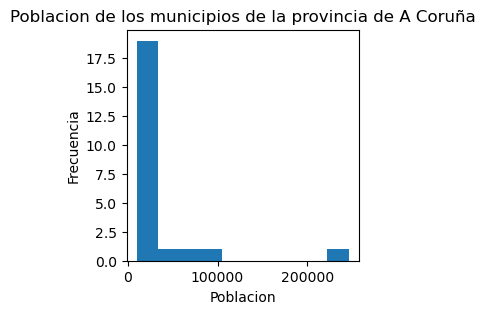

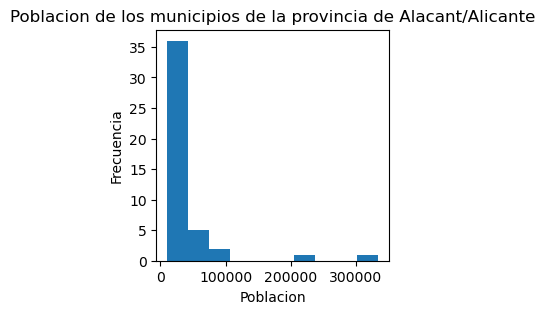

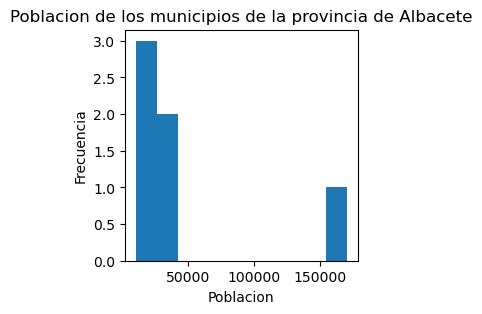

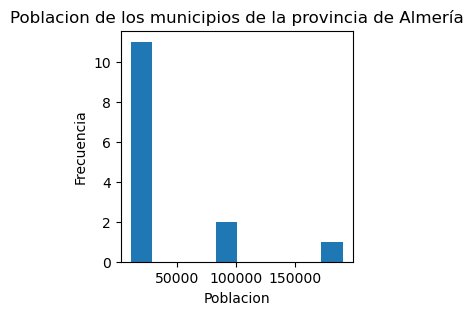

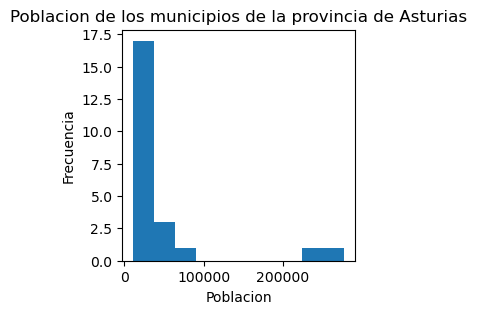

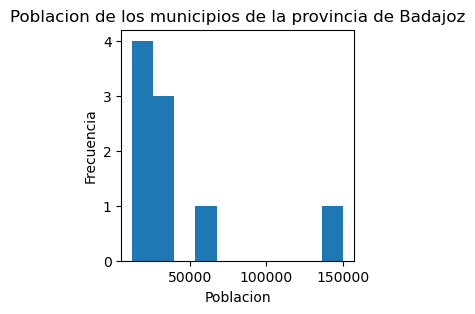

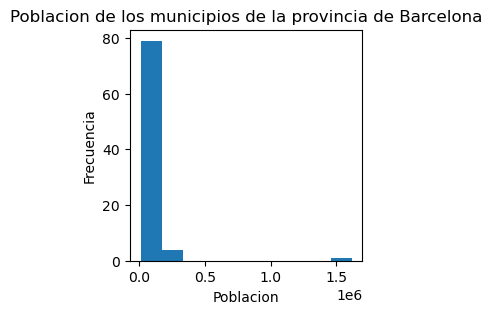

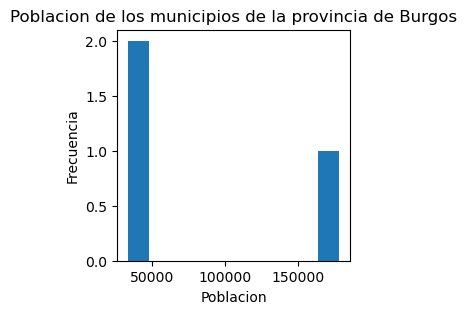

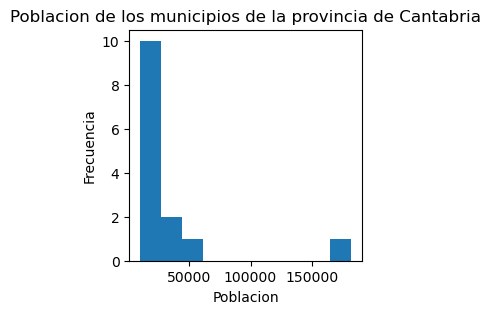

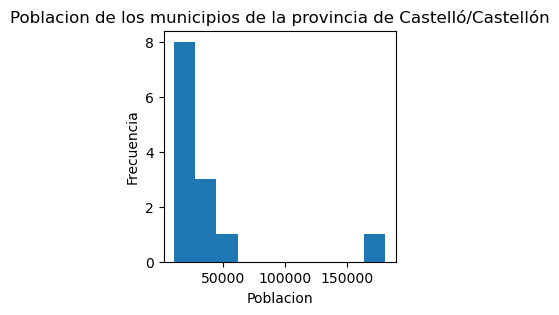

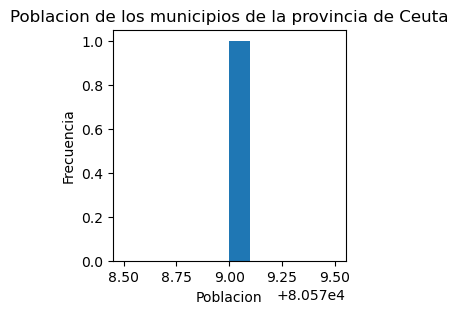

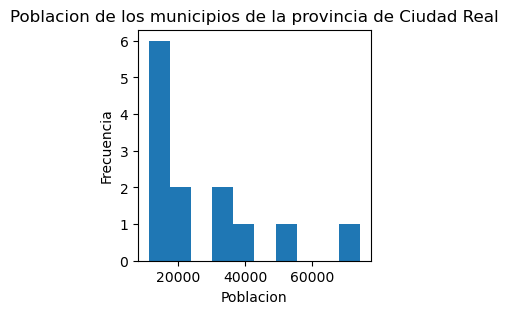

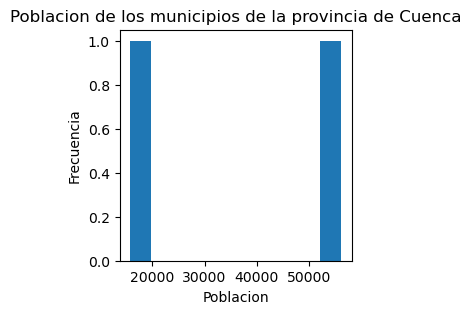

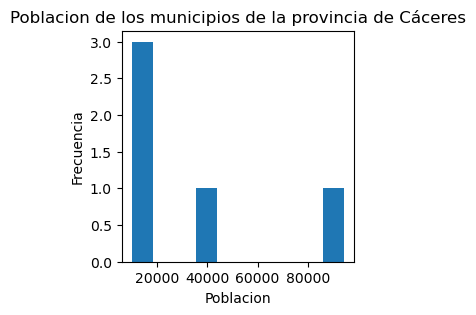

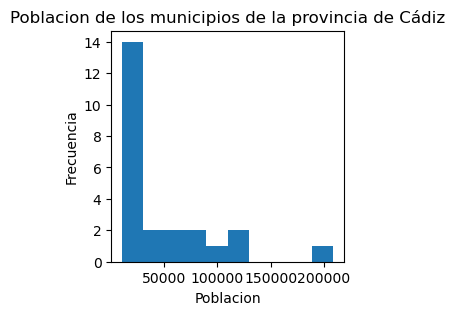

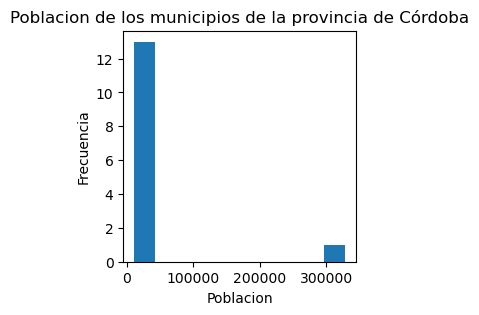

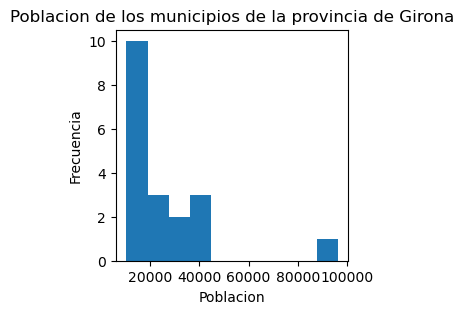

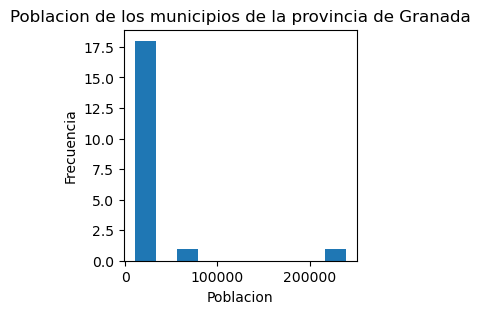

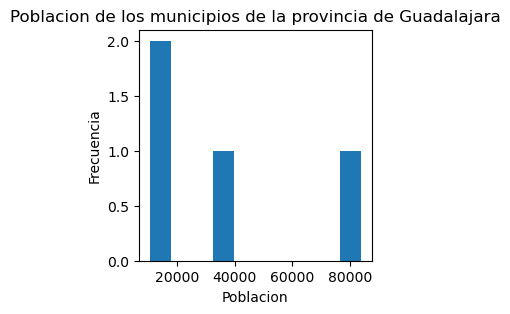

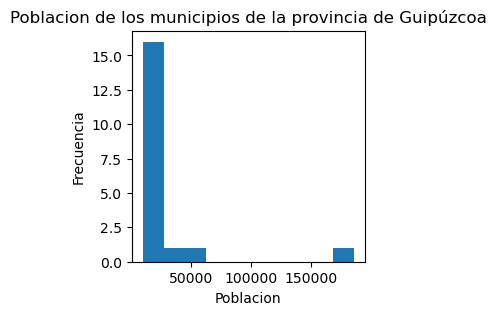

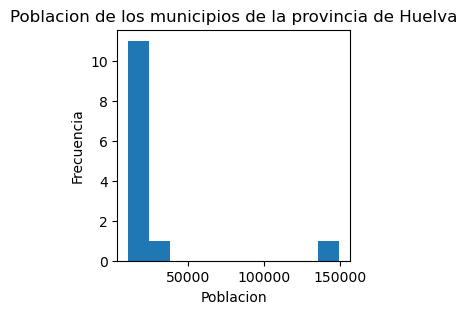

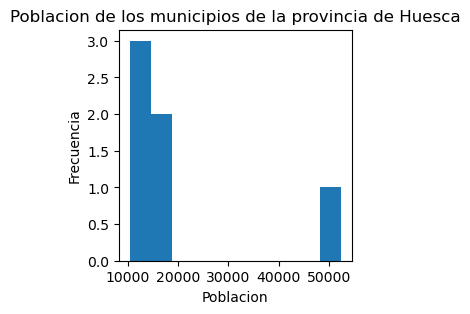

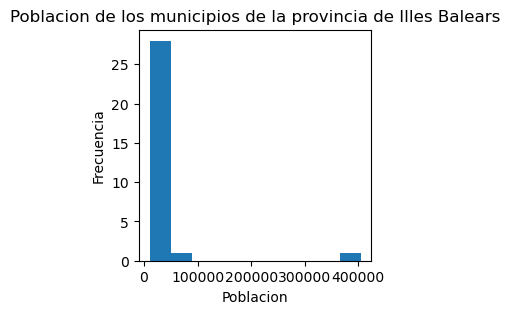

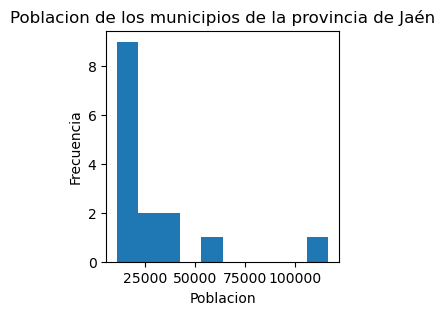

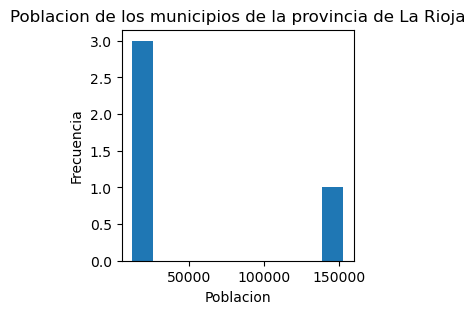

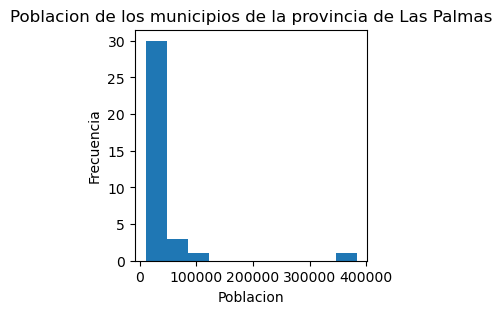

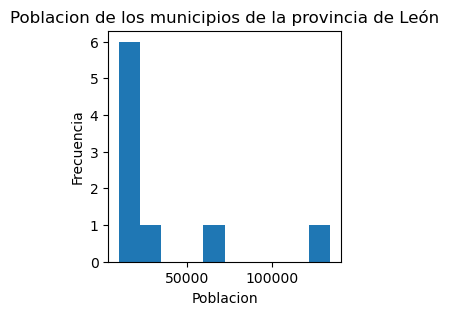

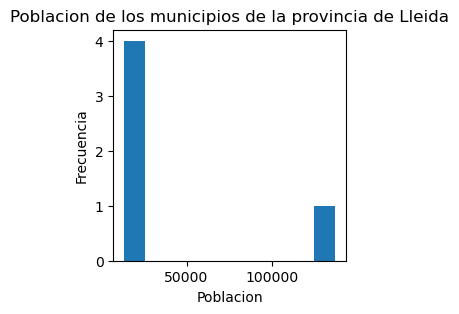

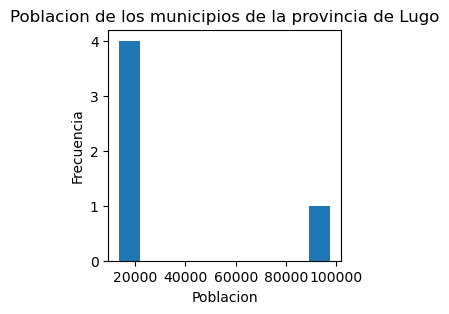

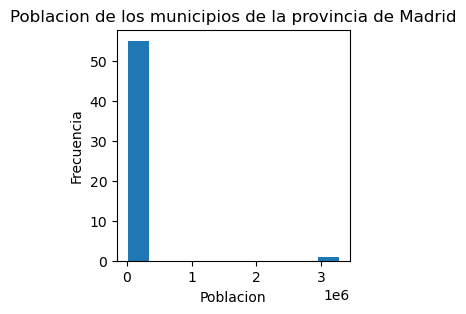

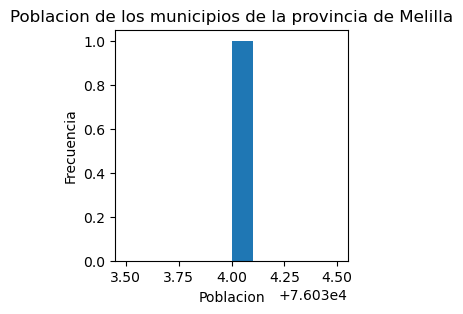

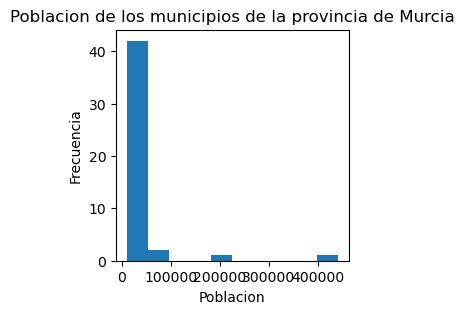

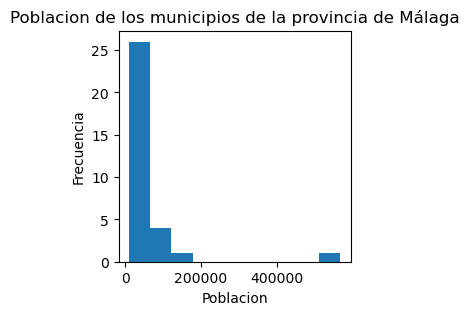

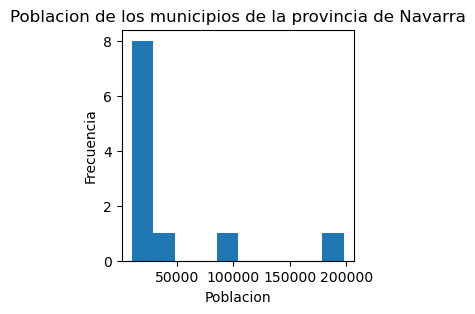

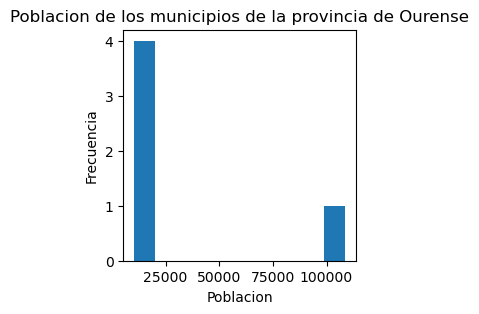

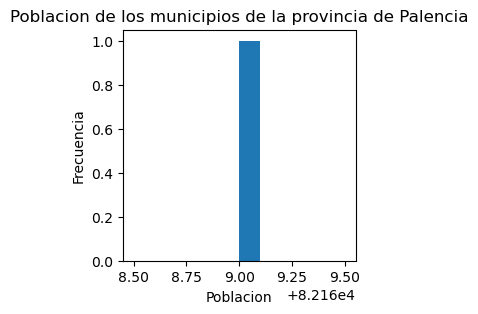

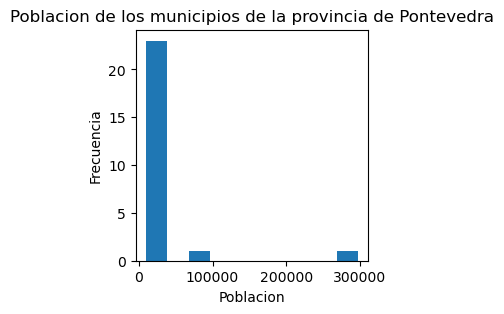

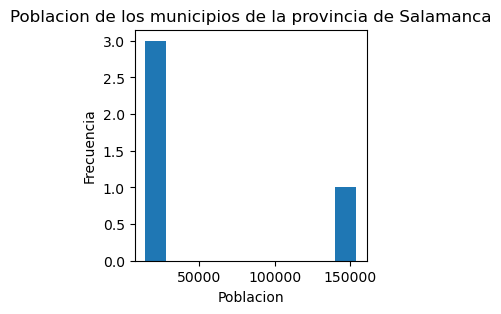

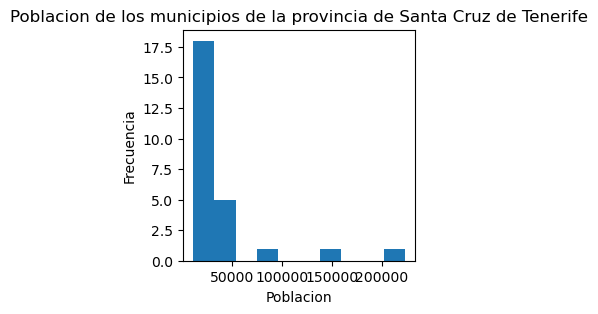

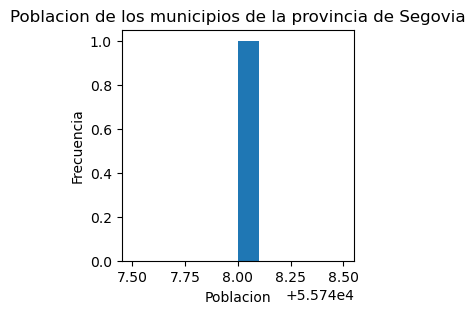

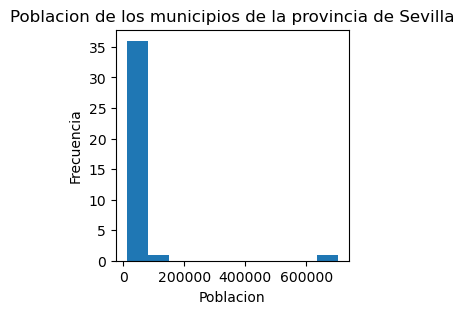

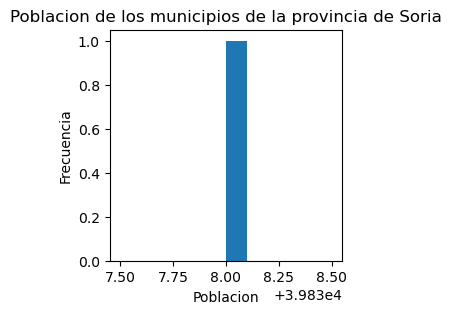

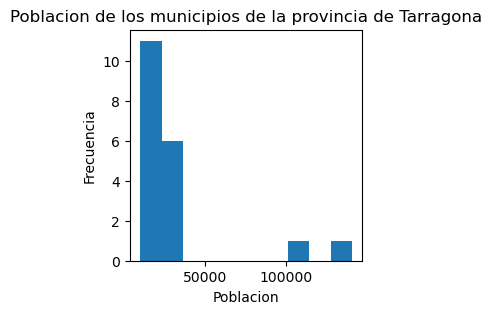

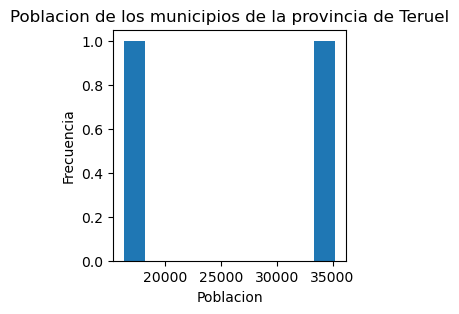

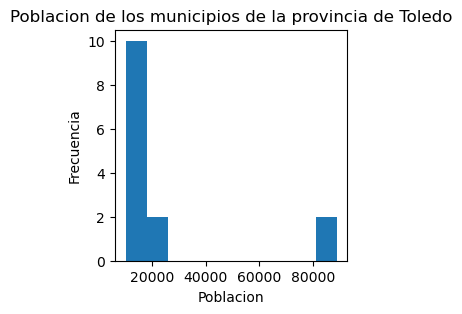

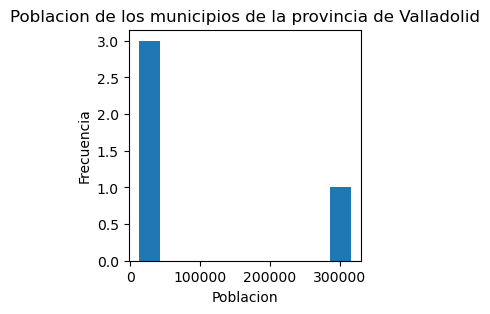

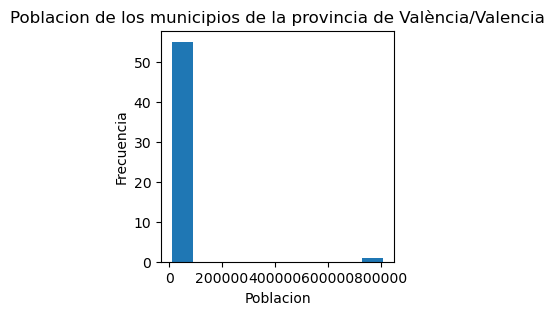

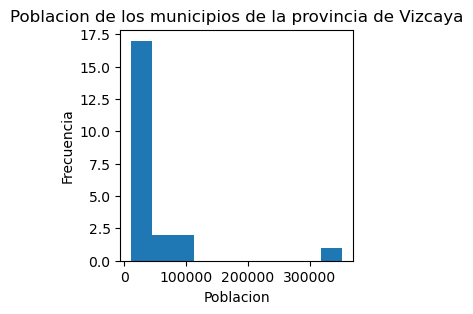

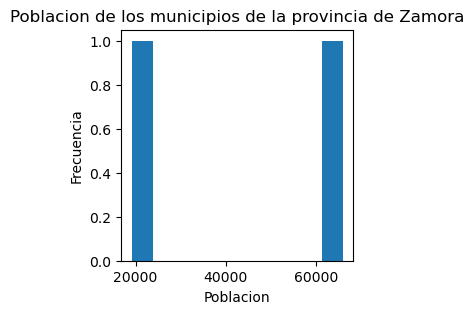

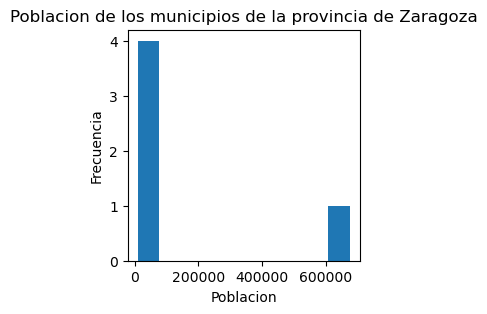

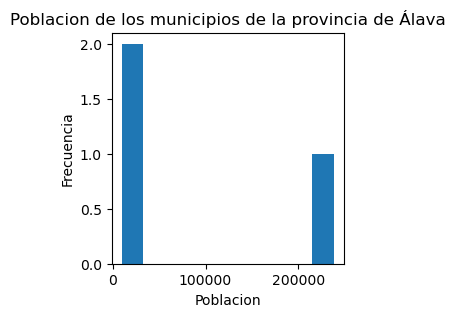

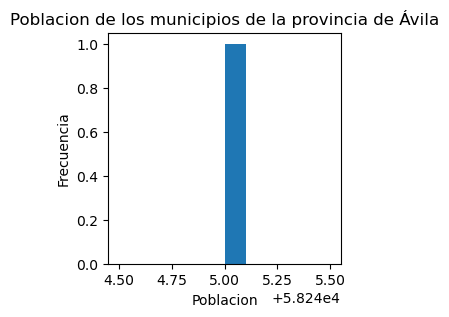

In [49]:
#creamos listas de provincias unicas para iterar
provincias = sorted(dataset["Provincia"].unique())

#creamos un histograma con poblaciones. se coloca dentro de ciclo para iterar
#y repetir el histograma para cada provincia
for i in provincias:
    data_histograma = dataset[(dataset["Provincia"] == i)]
    plt.figure(figsize=(3, 3))
    plt.hist(data_histograma["Poblacion"], bins=10)
    plt.xlabel('Poblacion')
    plt.ylabel('Frecuencia')
    plt.title('Poblacion de los municipios de la provincia de '+i)
    plt.show()

7) Seleccione al azar cincuenta municipios diferentes de
entre los diponibles en el archivo. Asegúrese de que no
se repitan. ¿Luego calcule el promedio de la población y
la desviación estándar de esto 50 municipios?.

In [50]:
#creamos nuevo dataset seleccionando 50 registros al azar del original
#seleccionamos que no haya repeticion (false)
dataset_random = dataset.sample(n=50, replace=False)

print("Población de 50 municipios al azar:\n")
print(f"Promedio: {dataset_random['Poblacion'].mean()}")
print(f"Desviacion estándar: {dataset_random['Poblacion'].std()}")

Población de 50 municipios al azar:

Promedio: 36990.26
Desviacion estándar: 44139.76424292291


8) Determine los nombres de los Municipios más cercano y
más lejano a Madrid. Para ello debe calcular la
distancia en todos ellos y Madrid. No considere a Madrid
en el análisis ya que la distancia sería cero.

In [75]:
#creamos dataset con la informacion de madrid
dataset_madrid = dataset[dataset["Municipio"] == "Madrid"]

#guardamos coordenadas de madrid en variables
x_madrid = dataset_madrid.iloc[0, 8]
y_madrid = dataset_madrid.iloc[0, 9]

#creamos dataset quitando a Madrid del original
dataset_resto = dataset[dataset["Municipio"] != "Madrid"].copy()

#creamos columna con las distancias a Madrid de cada municipio
dataset_resto["D"] = ((dataset_resto["X"] - x_madrid)**2 + (dataset_resto["Y"] - y_madrid)**2)**0.5

#obtenemos indices de municipios con mayor y menor distancia
min_indice = dataset_resto["D"].idxmin()
max_indice = dataset_resto["D"].idxmax()

municipio_min = dataset_resto.loc[min_indice, "Texto"]
municipio_max = dataset_resto.loc[max_indice, "Texto"]

print("El municipio con menor distancia a Madrid es: ", municipio_min)
print("El municipio con mayor distancia a Madrid es: ", municipio_max)

El municipio con menor distancia a Madrid es:  Humera-Somosaguas-prado del Rey
El municipio con mayor distancia a Madrid es:  Los Llanos de Aridane
